In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import argparse


In [3]:
concat_rewards = []
for seed in np.arange(0, 10, 1):
    rewards = np.load(
    'rewards_{}step_seed{:02d}.npy'.
    format(10000, seed))[:, :, :, :]
    if concat_rewards != []:
        concat_rewards = np.concatenate((concat_rewards,rewards[np.newaxis,:,:,:,:]),axis=0)
    else:
        concat_rewards = rewards[np.newaxis,:,:,:,:]


/Users/LiJiayi/anaconda3/envs/Learning-matrix/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [4]:
rewards = np.load(
    'rewards_{}step_seed{:02d}.npy'.format(10000, 0))[:, :, :, :]

In [5]:
rewards.shape

(21, 21, 10000, 3)

In [3]:
concat_rewards.shape

(10, 21, 21, 10000, 3)

In [4]:
temp = np.average(concat_rewards, axis=0)

In [5]:
def concat():
    concat_rewards = []
    for seed in np.arange(0, 10, 1):
        rewards = np.load(
        'rewards_{}step_seed{:02d}.npy'.
        format(10000, seed))[:, :, :, :]
        if concat_rewards != []:
            concat_rewards = np.concatenate((concat_rewards,rewards[np.newaxis,:,:,:,:]),axis=0)
        else:
            concat_rewards = rewards[np.newaxis,:,:,:,:]
    return np.average(concat_rewards, axis=0)

In [14]:
temp.shape

(21, 21, 10000, 3)

In [15]:
avg_time = np.average(temp, axis=2)

In [39]:
temp[:, :, 5650, 2][np.isposinf(temp[:, :, 5650, 2])]

array([inf, inf, inf])

In [42]:
np.ma.std(np.ma.masked_invalid(temp[:, :, :, 2]))

6132387775962652.0

In [6]:
import math
for t in range(0, 10000):
    if math.isnan(np.mean(temp[:, :, t, 2])):
        print(t)
print("good to go")

5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
good to go


In [47]:
mean = np.mean(temp[:, :, :, 1])
std = np.std(temp[:, :, :, 1])
print(mean)
print(std)
print(2*std + mean)
print(-2*std + mean)

0.0018343959569761294
0.009958425005161146
0.02175124596729842
-0.018082454053346162


In [ ]:
np.average(temp[:, :, (t-10):t, :], axis=2)

In [22]:
for t in range(10, 10000):
    temp[:, :, t, :] = np.average(temp[:, :, (t-10):t, :], axis=2)

In [33]:
temp.shape

(21, 21, 10000, 3)

In [34]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [49]:
rewards_2 = np.load(
    'rewards_{}step_seed{:02d}.npy'.
    format(10000, 1))[:, :, :, :]

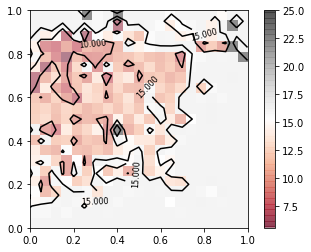

In [54]:
x = np.linspace(0.0, 1.0, 21)
y = np.linspace(0.0, 1.0, 21)

X, Y = np.meshgrid(x, y)
Z = rewards_2[:, :, 2000, 0]

contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();


In [111]:
observations = np.load('observation_10000step_seed00.npy')

In [112]:
observations = observations.reshape(21, 21, 10000, 27)

In [113]:
observations.shape

(21, 21, 10000, 27)

In [120]:
import gym
import gym_diamond
import numpy as np
import argparse

env = gym.make('diamond-v0')
rewards = []
search_points = np.linspace(0.0, 1.0, 21)
duration = 10000
for p12_index in np.arange(len(search_points)):
    for p23_index in np.arange(len(search_points)):
        for t_index in range(duration):
            obs = observations[p12_index, p23_index, t_index, :]
            rewards.append(env.get_reward(obs, category='out'))
            rewards.append(env.get_reward(obs, category='sum'))
            rewards.append(env.get_reward(obs, category='nas'))

Initializing diamond environment...
 Retrying in 1 seconds


/Users/LiJiayi/sumo/Learning_matrix/gym_diamond/gym_diamond/envs/diamond_env.py:134: RuntimeWarning: divide by zero encountered in double_scalars
  observation[i*3+1])
/Users/LiJiayi/sumo/Learning_matrix/gym_diamond/gym_diamond/envs/diamond_env.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  observation[3*3]/observation[3*3+2] + \


In [139]:
rewards[:, :, 8000, 2]

array([[1.05494766e+02, 1.05494766e+02, 1.05494766e+02, 1.05494766e+02,
        1.05494766e+02, 1.05408415e+02, 1.05408415e+02, 1.05494766e+02,
        1.01732817e+02, 1.05408415e+02, 1.05408415e+02, 1.05806869e+02,
        1.05806869e+02, 1.05494766e+02, 1.05494766e+02, 1.05408415e+02,
        1.04710400e+02, 1.05806869e+02, 1.05408415e+02, 1.05408415e+02,
        1.05806869e+02],
       [2.04533878e+01, 9.73656391e+01, 6.37882763e+01, 1.24651895e+02,
        7.72131951e+01, 3.99540917e+02, 1.78162312e+01, 1.03711506e+02,
        7.42312437e+01, 3.98355706e+01, 1.57645741e+02, 1.44735333e+02,
        5.44579514e+01, 4.03650389e+01, 9.89094920e+02, 3.51496075e+02,
        2.14234348e+02, 2.81563718e+02, 1.08592490e+00, 1.72793615e+02,
        4.31701290e+01],
       [5.30898081e+03, 1.41820403e+02, 9.35126870e+01, 6.11979376e+01,
        6.17767169e+01, 3.43239680e+02, 2.99270454e+02, 3.30762220e+02,
        5.59832169e+00, 4.63585972e+00, 2.31478253e+02, 1.29303237e+01,
        3.7541

In [121]:
rewards = np.asarray(rewards)
rewards = rewards.reshape(21, 21, 10000, 3)

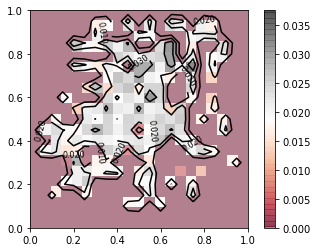

In [123]:
x = np.linspace(0.0, 1.0, 21)
y = np.linspace(0.0, 1.0, 21)

X, Y = np.meshgrid(x, y)

Z = rewards[:, :, 2995, 1]

contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();


In [107]:
old_rewards = np.load(
    'rewards_{}step_seed{:02d}.npy'.format(10000, 1))[:, :, :, :]

/Users/LiJiayi/anaconda3/envs/Learning-matrix/lib/python3.5/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/LiJiayi/anaconda3/envs/Learning-matrix/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

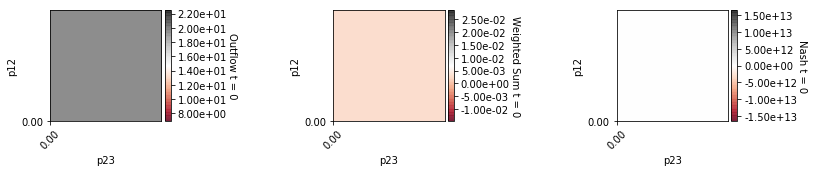

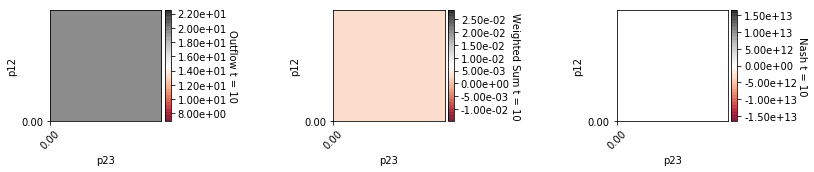

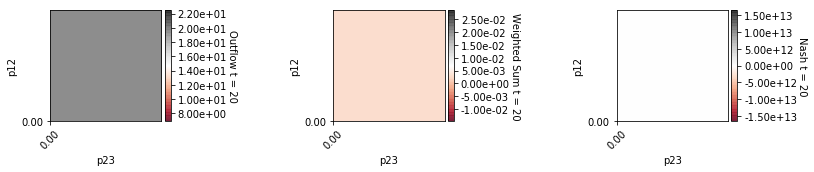

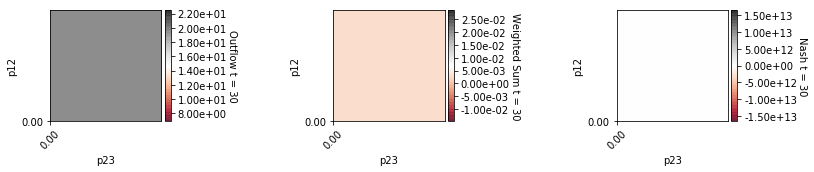

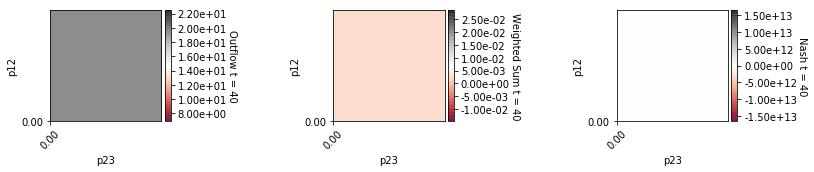

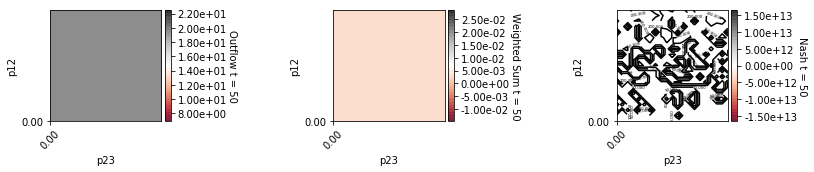

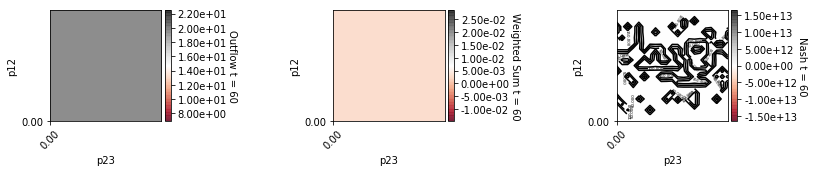

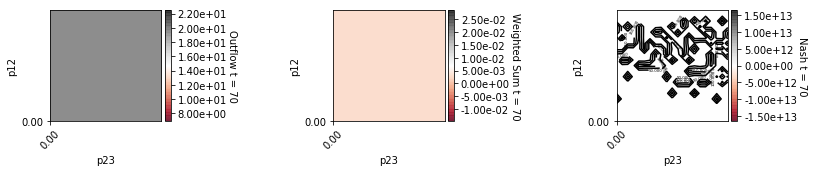

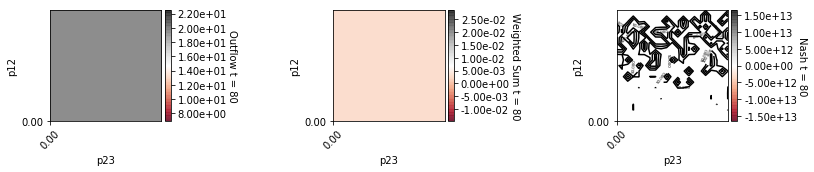

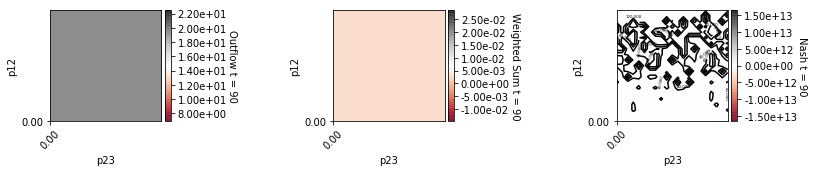

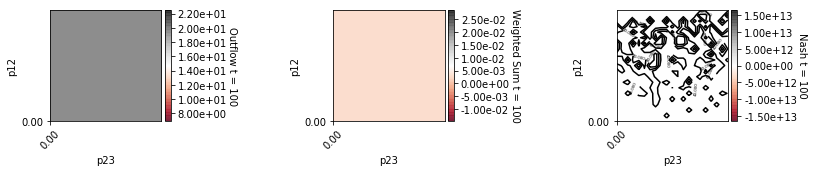

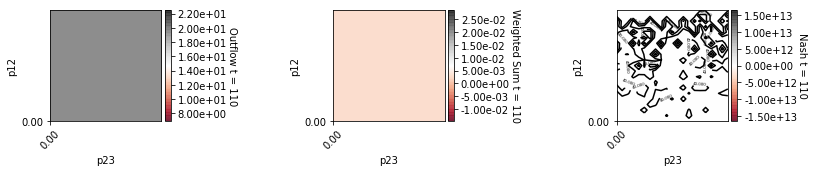

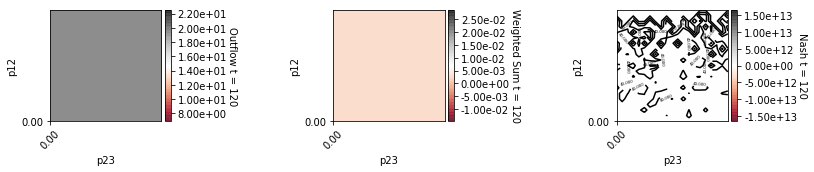

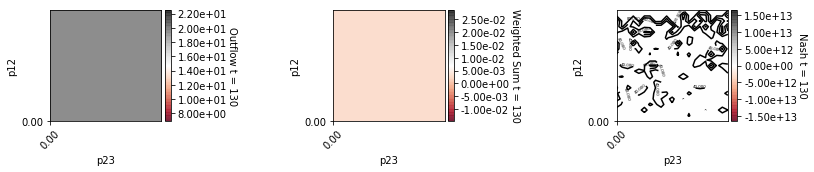

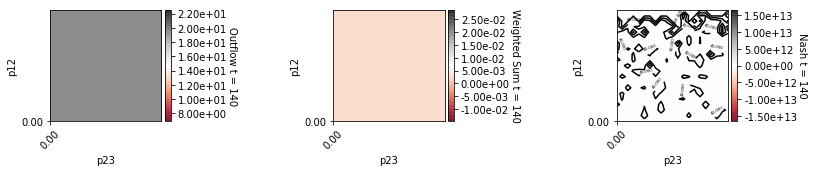

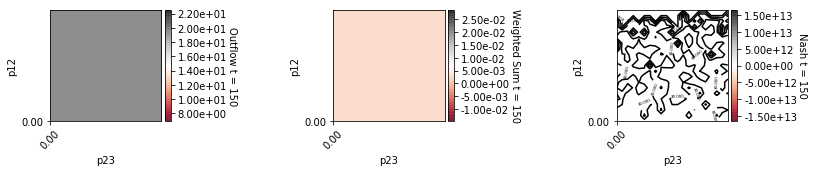

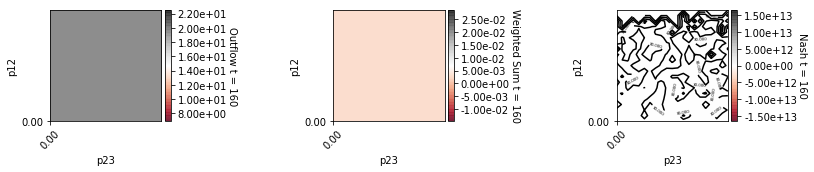

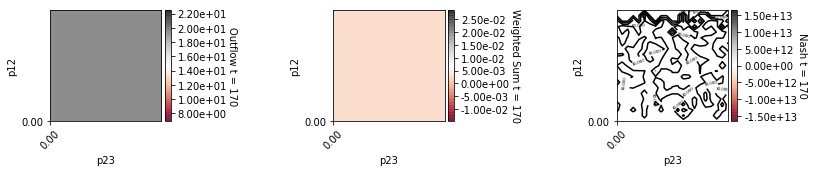

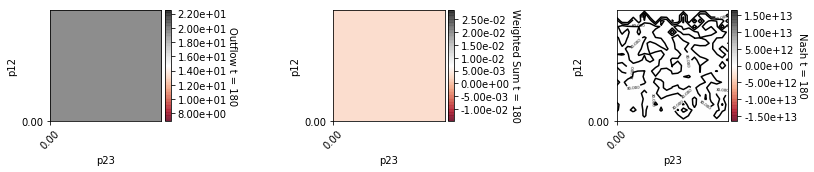

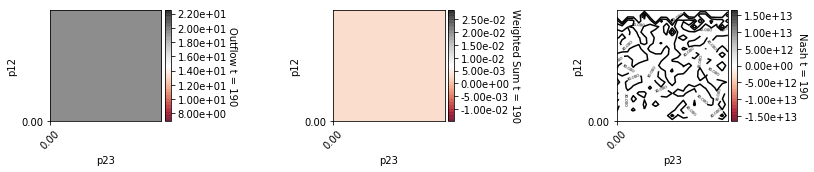

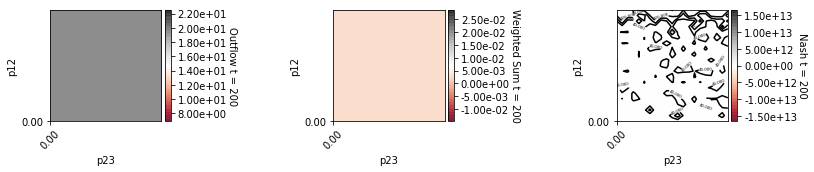

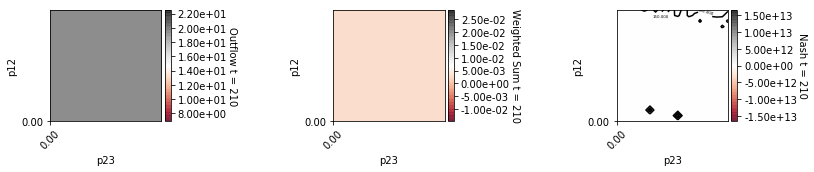

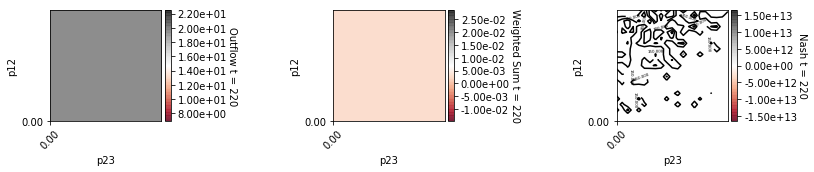

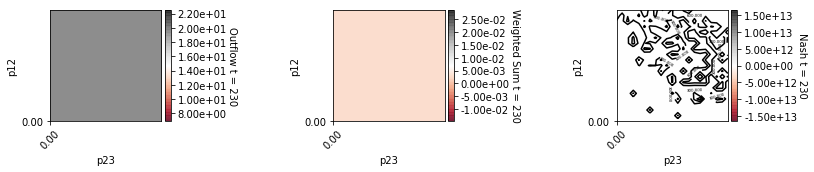

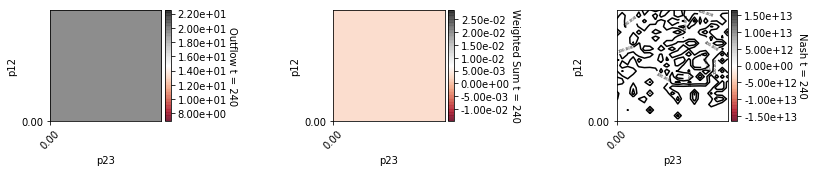

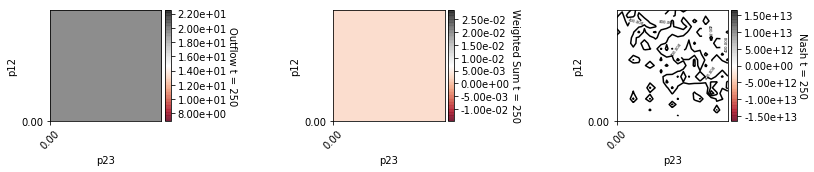

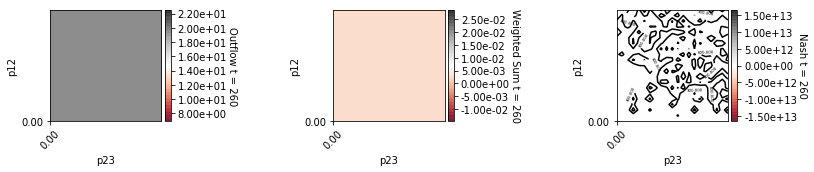

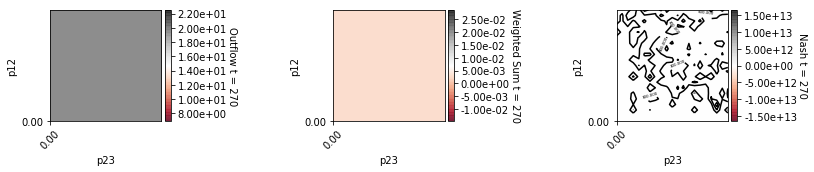

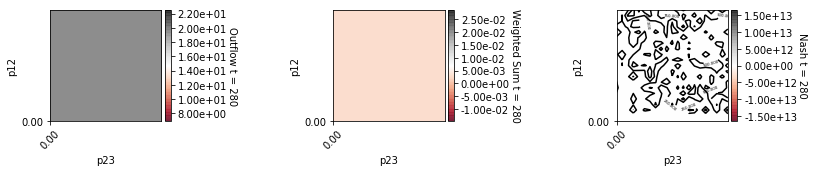

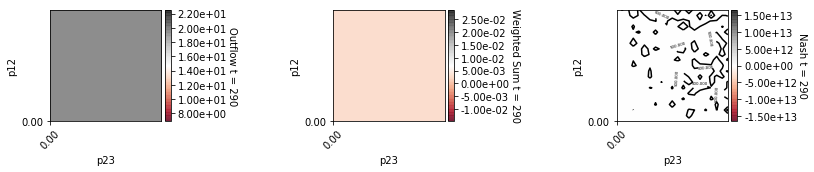

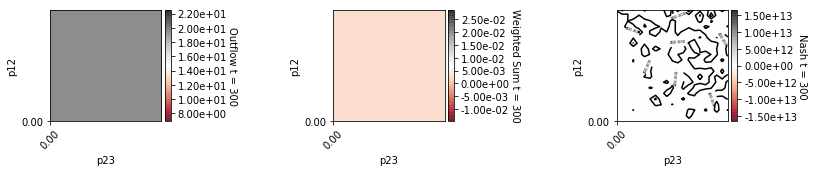

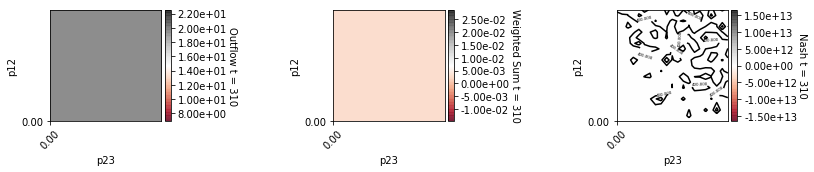

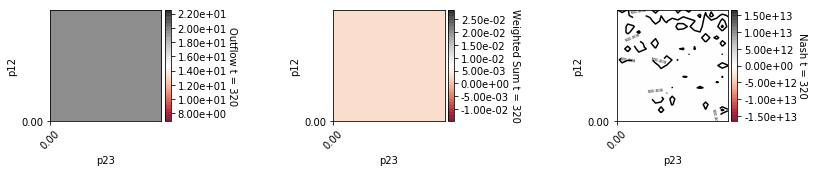

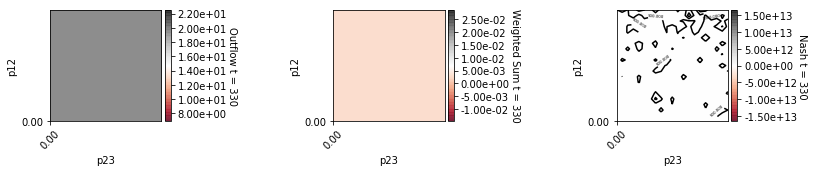

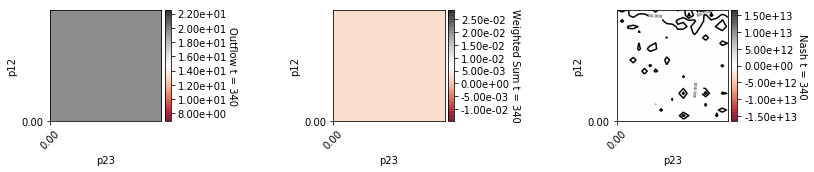

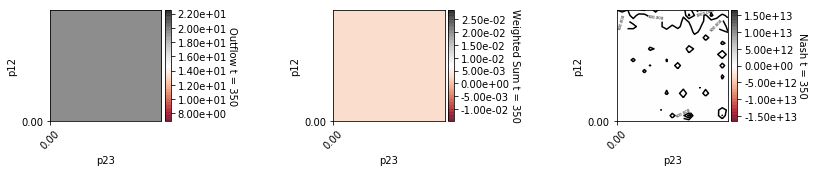

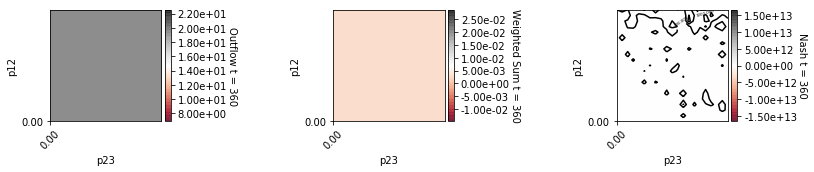

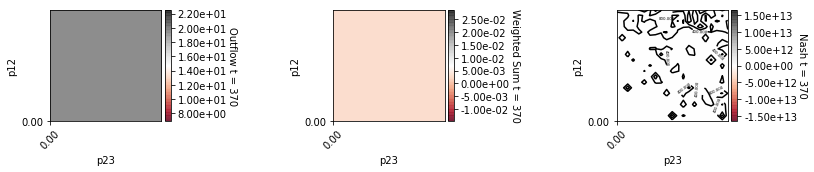

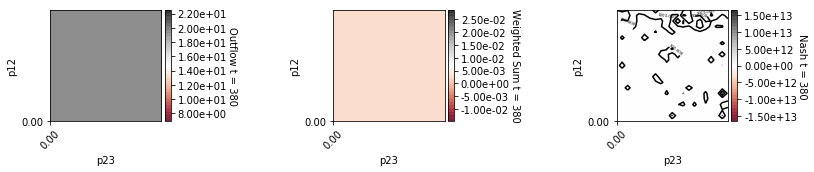

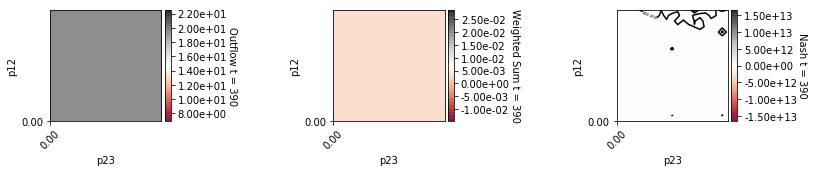

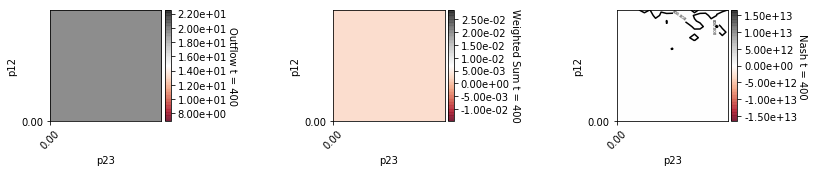

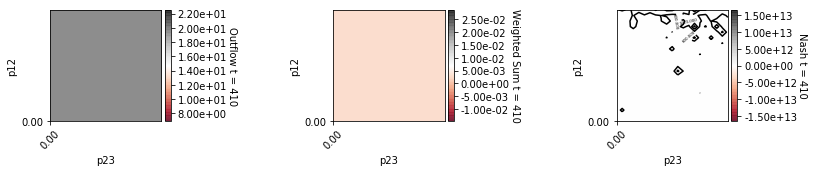

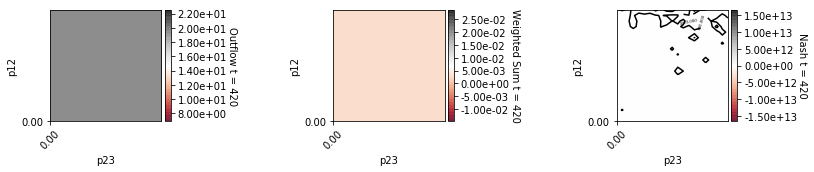

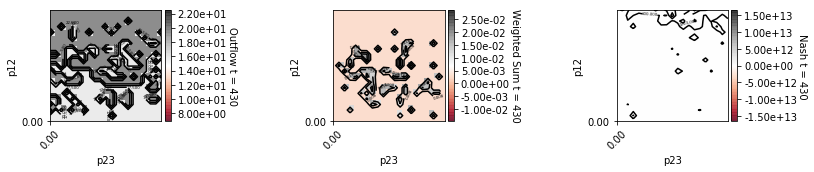

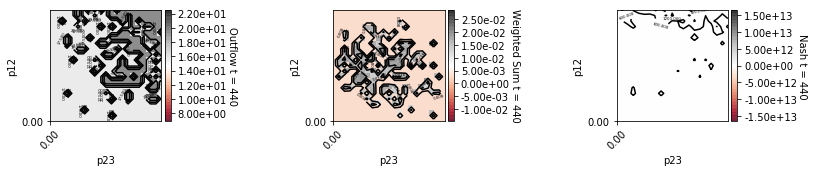

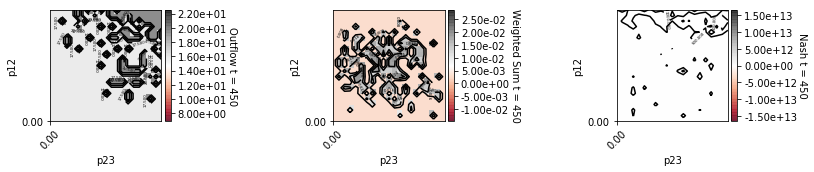

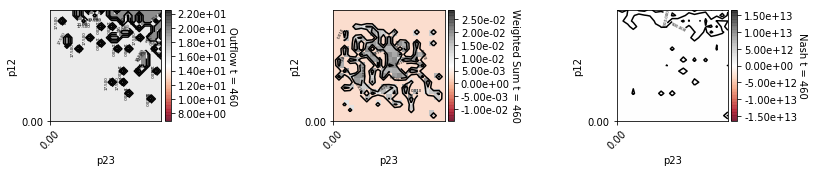

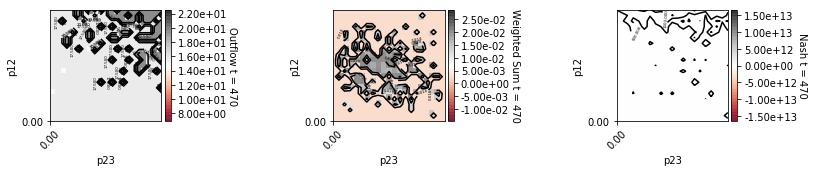

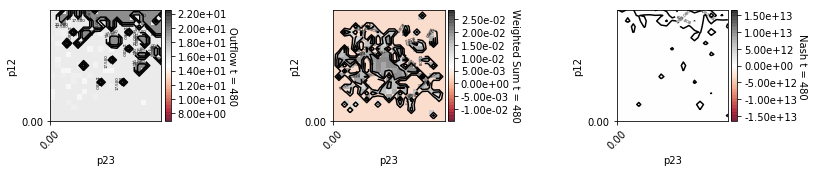

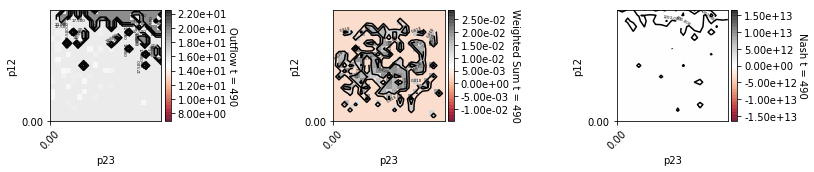

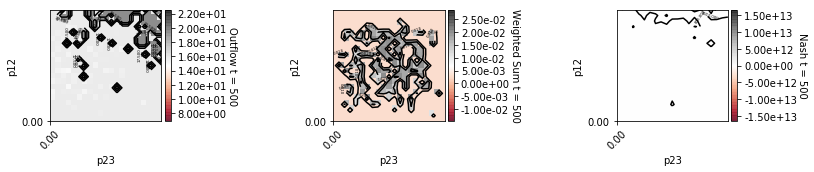

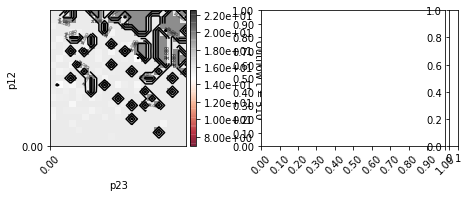

In [130]:
duration = 5000
seed = 0
rewards_time_avg = rewards
for timestep in np.arange(0, 10000, 10):
    rewards1 = rewards_time_avg[:, :, timestep, :]
    #fig = plt.figure(figsize=(30, 5))
    fig = plt.figure(figsize=(12, 2.5))
    for x in range(rewards_time_avg.shape[-1]):
        t = 0
        ax = fig.add_subplot(
            1,
            rewards1.shape[-1],
            t * rewards1.shape[-1] + x + 1
        )
        ticks = np.linspace(0, rewards1.shape[0]-1, 11)
        ticklabels = [
            '{:.2f}'.format(i/(10))
            for i in range(11)
        ]
        ax.set_xticks(ticks)
        ax.set_xticklabels(ticklabels, rotation=45, ha='center')
        ax.set_yticks(ticks)
        ax.set_yticklabels(ticklabels)
        div = make_axes_locatable(ax)
        cax = div.append_axes('right', size='5%', pad=0.05)
        if x != 2:
            mean_val = np.mean(rewards_time_avg[:, :, :, x])
            sd_val = np.std(rewards_time_avg[:, :, :, x])  
        else:
            mean_val = np.ma.mean(np.ma.masked_invalid(rewards_time_avg[:, :, :, x]))
            sd_val = np.ma.std(np.ma.masked_invalid(rewards_time_avg[:, :, :, x]))  


        v_min = mean_val - 2 * sd_val
        v_max = mean_val + 2 * sd_val
        X = np.linspace(0.0, 1.0, 21)
        Y = np.linspace(0.0, 1.0, 21)

        X, Y = np.meshgrid(X, Y)

        Z = rewards_time_avg[:, :, timestep, x] #rewards[:, :, x]
        contours = ax.contour(X, Y, Z, 3, colors='black')

        plt.clabel(contours, inline=True, fontsize=4)
        #plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower', cmap='RdGy', alpha=0.5)
        im = ax.imshow(
            Z, 
            extent=[0, 1, 0, 1], 
            vmin = v_min,
            vmax = v_max, 
            origin='lower',
            cmap='RdGy',
            alpha=0.5
        )
        cbar = plt.colorbar(
            im,
            cax=cax,
            orientation='vertical',
            format='%.2e'
        )

        if x == 0:
            cbar.set_label(
                'Outflow t = {}'.format(timestep),
                rotation=270,
                labelpad=10
            )
        elif x == 1:
            cbar.set_label(
                'Weighted Sum t = {}'.format(timestep),
                rotation=270,
                labelpad=10
            )
        else:
            cbar.set_label(
                'Nash t = {}'.format(timestep),
                rotation=270,
                labelpad=10
            )
        ax.set_xlabel('p23')
        ax.set_ylabel('p12')
    plt.tight_layout()
    plt.savefig('newpics/rewards1_{}step_{:05d}seed_{:02d}.png'.format(duration, timestep, seed))

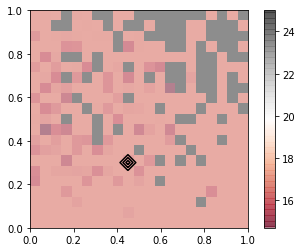

In [142]:
Z2 = rewards[:, :, 2995, 2]
contours = plt.contour(X, Y, Z2, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

In [150]:
np.std(rewards[:, :, :, 2])

/Users/LiJiayi/anaconda3/envs/Learning-matrix/lib/python3.5/site-packages/numpy/core/_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


nan